In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn  as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Conv1D, Flatten, Dense

In [7]:
# dataset = pd.read_csv('data/data-tc.csv')
# X = pd.read_csv('data/data-tc.csv', usecols=['Complexity', 'Time', 'Cost'])
dataset = pd.read_csv('data/kmeans/data-preprocess.csv')
X = pd.read_csv('data/kmeans/data-preprocess.csv', usecols=['Complexity', 'Time', 'Cost'])

<AxesSubplot:xlabel='Class', ylabel='Count'>

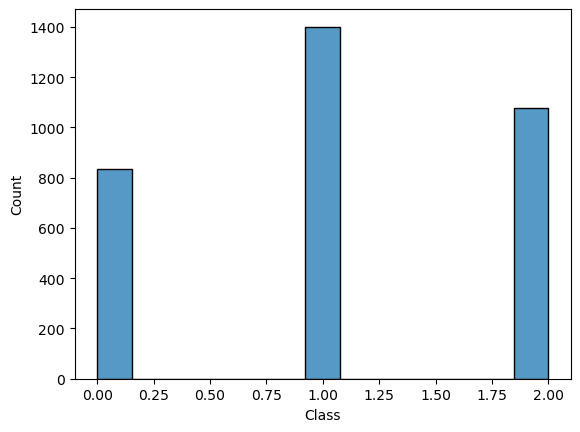

In [8]:
sns.histplot(dataset['Class'])

In [9]:
X_train = pd.read_csv('data/kmeans/data-train.csv').drop(['B_Req'], axis=1)
X_test = pd.read_csv('data/kmeans/data-test.csv').drop(['B_Req'], axis=1)
y_train = X_train['Class']
y_test = X_test['Class']

In [10]:
X_train.drop(['Class'], axis=1, inplace=True)
X_test.drop(['Class'], axis=1, inplace=True)

In [11]:
model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], 1)))
model.add(Dense(1, activation='sigmoid'))

In [12]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

accuracy = model.evaluate(X_test, y_test)
print("Accuracy: ", accuracy)

predictions = model.predict(X_test)
y_pred = [1 if x > 0.5 else 0 for x in predictions]

Epoch 1/10
83/83 [==============================] - 4s 14ms/step - loss: -0.3069 - accuracy: 0.4161 - val_loss: -0.9547 - val_accuracy: 0.4555
Epoch 2/10
83/83 [==============================] - 0s 5ms/step - loss: -1.0276 - accuracy: 0.4146 - val_loss: -1.2928 - val_accuracy: 0.4555
Epoch 3/10
83/83 [==============================] - 0s 6ms/step - loss: -1.3132 - accuracy: 0.4146 - val_loss: -1.6207 - val_accuracy: 0.4555
Epoch 4/10
83/83 [==============================] - 1s 7ms/step - loss: -1.6737 - accuracy: 0.4146 - val_loss: -2.0894 - val_accuracy: 0.4555
Epoch 5/10
83/83 [==============================] - 1s 7ms/step - loss: -2.2060 - accuracy: 0.4146 - val_loss: -2.6628 - val_accuracy: 0.4555
Epoch 6/10
83/83 [==============================] - 0s 5ms/step - loss: -3.2731 - accuracy: 0.4146 - val_loss: -4.7040 - val_accuracy: 0.4555
Epoch 7/10
83/83 [==============================] - 0s 6ms/step - loss: -7.6796 - accuracy: 0.4315 - val_loss: -10.3647 - val_accuracy: 0.5641
Epoc

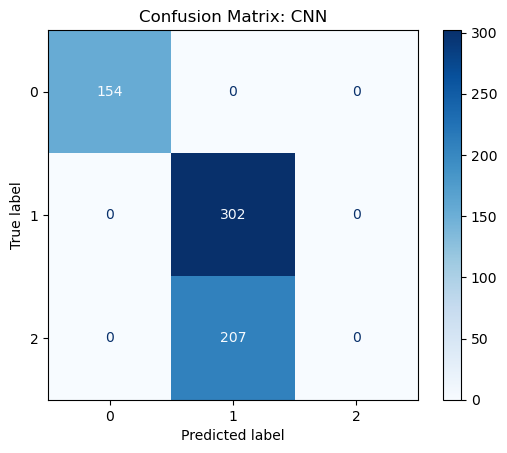

In [22]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix: CNN")
plt.show()

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       154
           1       0.59      1.00      0.74       302
           2       0.00      0.00      0.00       207

    accuracy                           0.69       663
   macro avg       0.53      0.67      0.58       663
weighted avg       0.50      0.69      0.57       663



c:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
